In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


path = r"C:\Users\sahab\Downloads\Mall_Customers.csv"

In [2]:
data = pd.read_csv(path)
data = data.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending_Score'})

<AxesSubplot:xlabel='Spending_Score', ylabel='Age'>

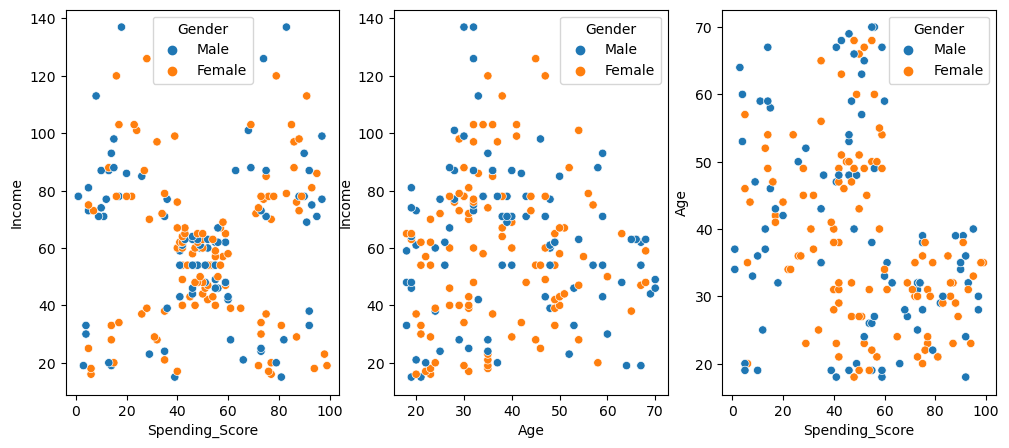

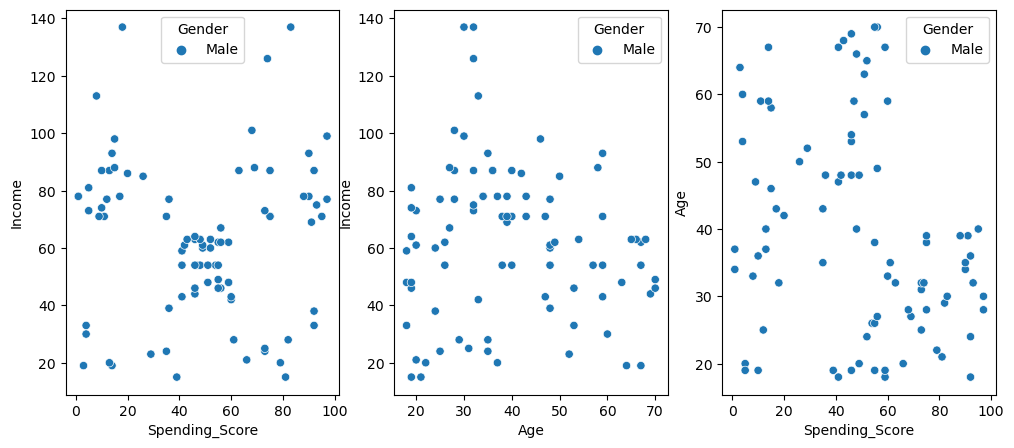

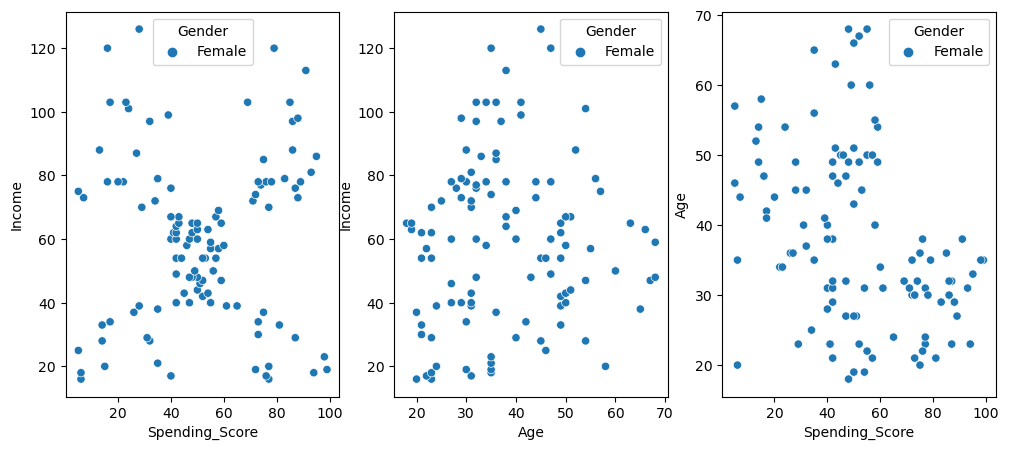

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

sns.scatterplot(x="Spending_Score", y="Income", data=data, hue="Gender", ax=ax[0])
sns.scatterplot(x="Age", y="Income", data=data, hue="Gender", ax=ax[1])
sns.scatterplot(x="Spending_Score", y="Age", data=data, hue="Gender", ax=ax[2])

fig, ax = plt.subplots(1, 3, figsize=(12,5))
sns.scatterplot(x="Spending_Score", y="Income", data=data[data.Gender == 'Male'], hue="Gender", ax=ax[0])
sns.scatterplot(x="Age", y="Income", data=data[data.Gender == 'Male'], hue="Gender", ax=ax[1])
sns.scatterplot(x="Spending_Score", y="Age", data=data[data.Gender == 'Male'], hue="Gender", ax=ax[2])

fig, ax = plt.subplots(1, 3, figsize=(12,5))
sns.scatterplot(x="Spending_Score", y="Income", data=data[data.Gender == 'Female'], hue="Gender", ax=ax[0])
sns.scatterplot(x="Age", y="Income", data=data[data.Gender == 'Female'], hue="Gender", ax=ax[1])
sns.scatterplot(x="Spending_Score", y="Age", data=data[data.Gender == 'Female'], hue="Gender", ax=ax[2])

<AxesSubplot:xlabel='Gender', ylabel='Spending_Score'>

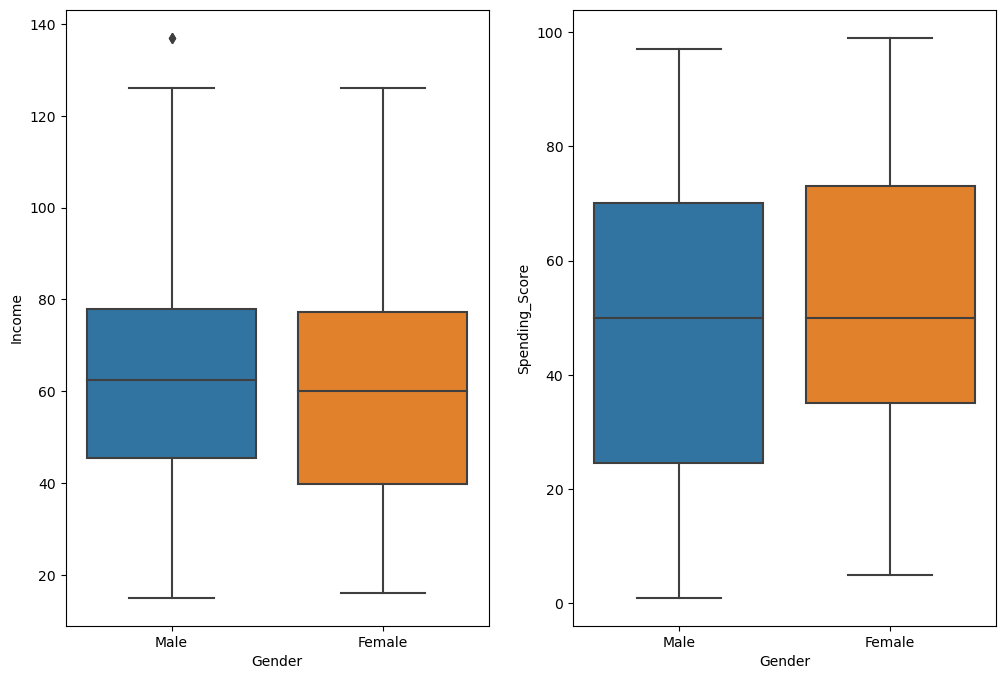

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

sns.boxplot(x="Gender", y="Income", data=data, orient='v' , ax=axes[0])
sns.boxplot(x="Gender", y="Spending_Score", data=data, orient='v' , ax=axes[1])

In [5]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

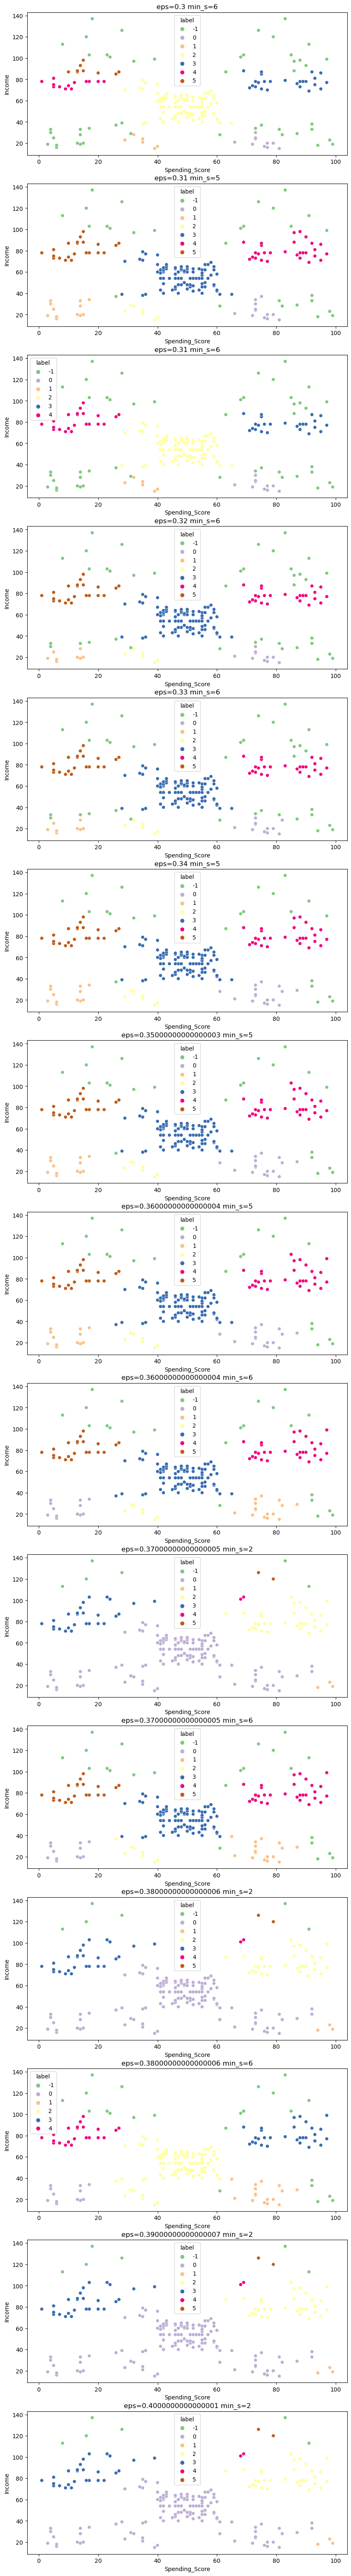

In [69]:
eps = np.arange(0.3, 0.4, 0.01)
min_samples = [2, 3, 4, 5, 6]

labels_list = []
for i in eps:
    for j in min_samples:
        gsdf = data.copy()
        ds = gsdf[['Spending_Score', 'Income']]
        ds = StandardScaler().fit_transform(ds)
        clustering_labels = DBSCAN(eps=i, min_samples=j).fit_predict(ds)
        gsdf['label'] = clustering_labels
        gsdf['eps'] = i
        gsdf['min_s'] = j
        labels_list.append(gsdf)

new_list = [i for i in labels_list if (i.label.nunique() <= 7 and i.label.nunique() >= 6)]        

fig, ax = plt.subplots(len(new_list), 1, figsize=(10,80))
for i in range(len(new_list)):
    sns.scatterplot(x="Spending_Score", y="Income", data=new_list[i], hue="label", ax=ax[i], palette='Accent').set(title=f'eps={float(new_list[i].head(1).eps)} min_s={int(new_list[i].head(1).min_s)}')

Most optimal eps and m_s = 0.37, 6

<AxesSubplot:xlabel='Spending_Score', ylabel='Income'>

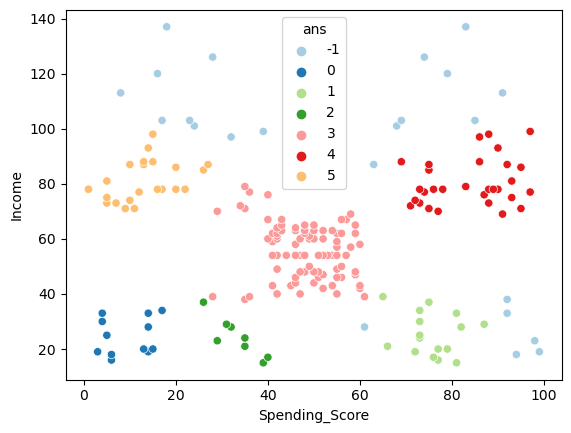

In [72]:
ds = data[['Spending_Score', 'Income']]
ds = StandardScaler().fit_transform(ds)
clustering_labels = DBSCAN(eps=0.37, min_samples=6).fit_predict(ds)
data['ans'] = clustering_labels
sns.scatterplot(x="Spending_Score", y="Income", data=data, hue="ans", palette="Paired")